## Análise de dados do SINASC 2019 de Rondônia

### Carregando a base de dados

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sinasc = pd.read_csv('sinasc_RO_2019.csv')
sinasc.head(2)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [2]:
sinasc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

### Tratamento dos Dados

In [3]:
#Verficando os missing em cada coluna de interesse
sinasc.loc[:, ['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE', 'CONSULTAS']].isna().sum()

APGAR1         96
APGAR5        103
SEXO            4
GESTACAO     1232
ESTCIVMAE     317
CONSULTAS       0
dtype: int64

In [4]:
#Removendo linhas com valores ausentes para as colunas APGAR5 e SEXO
sinasc.dropna(subset = ['APGAR5', 'SEXO'], inplace = True)
#Substituindo valores NaN na coluna GESTACAO
sinasc['GESTACAO'].fillna('Ignorado', inplace = True)
#Convertendo valores de APGAR5 para tipo inteiro
sinasc['APGAR5'] = sinasc['APGAR5'].astype('int')
#Contagem de missings após tratamento dos dados ausentes
sinasc[['APGAR5','SEXO', 'GESTACAO', 'PESO']].isna().sum()

APGAR5      0
SEXO        0
GESTACAO    0
PESO        0
dtype: int64

In [5]:
#Contagem dos valores para cada um das categoria da varíavel GESTACAO
sinasc['GESTACAO'].value_counts()

37 a 41 semanas        22520
32 a 36 semanas         2233
Ignorado                1216
42 semanas e mais        698
28 a 31 semanas          162
22 a 27 semanas           85
Menos de 22 semanas        7
Name: GESTACAO, dtype: int64

In [6]:
#Reatribuindo valores da coluna EStado civil da mãe 
sinasc.loc[sinasc['ESTCIVMAE'] == 1, 'ESTCIVMAE'] = 'Solteira'
sinasc.loc[sinasc['ESTCIVMAE'] == 2, 'ESTCIVMAE'] = 'Casada'
sinasc.loc[sinasc['ESTCIVMAE'] == 3, 'ESTCIVMAE'] = 'Viúva'
sinasc.loc[sinasc['ESTCIVMAE'] == 4, 'ESTCIVMAE'] = 'Separado judicialmente'
sinasc.loc[sinasc['ESTCIVMAE'] == 5, 'ESTCIVMAE'] = 'União consensual'
sinasc.loc[sinasc['ESTCIVMAE'] == 9, 'ESTCIVMAE'] = 'Ignorado'
#Preenchindo os missings com o valor 'Ignorado'
sinasc['ESTCIVMAE'].fillna('Ignorado', inplace = True)
#Cotagem dos valores de cada categoria estado civil
sinasc['ESTCIVMAE'].value_counts().sort_values()

Viúva                       57
Separado judicialmente     451
Ignorado                   459
União consensual          7145
Solteira                  8905
Casada                    9904
Name: ESTCIVMAE, dtype: int64

In [7]:
#Substituindo valores da varíavel consulta
sinasc.loc[sinasc['CONSULTAS'] == 1, 'CONSULTAS'] = 'Nenhuma'
sinasc.loc[sinasc['CONSULTAS'] == 2, 'CONSULTAS'] = 'De 2 a 3'
sinasc.loc[sinasc['CONSULTAS'] == 3, 'CONSULTAS'] = 'De 4 a 6'
sinasc.loc[sinasc['CONSULTAS'] == 4, 'CONSULTAS'] = '7 ou mais'
sinasc.loc[sinasc['CONSULTAS'] == 9, 'CONSULTAS'] = 'Ignorado'
#Contagem dos valores
sinasc['CONSULTAS'].value_counts()

7 ou mais    18583
De 4 a 6      5957
De 2 a 3      1359
Nenhuma        972
Ignorado        50
Name: CONSULTAS, dtype: int64

### Gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

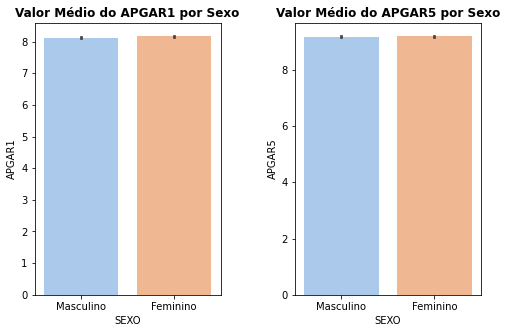

In [8]:
#Plotagem do valor médio do APGAR1 e APGAR5 por sexo 
with mpl.rc_context({'figure.subplot.wspace': 0.4}):
    plt.close('all')
    fig, ax = plt.subplots(1, 2, figsize = (8, 5))
    cols = ['APGAR1', 'APGAR5']
    for ax, col in zip(fig.get_axes(), cols):
        sns.barplot(ax = ax, x = 'SEXO', y = col, data = sinasc, palette = 'pastel')
        #Criando títulos
        ax.set_title(f"Valor Médio do {col} por Sexo", fontweight = 'bold')

In [9]:
#Agrupando as categorias da variável GESTACAO, 
#calculando a média dos valores do APGAR5 de cada categoria e ordenado os valores em ordem crescente
#Atribuindo valores a uma variável
media_grupo = sinasc.groupby('GESTACAO')['APGAR5'].mean().sort_values().values
#Atribuindo os índices a uma variável
nomes_grupo = sinasc.groupby('GESTACAO')['APGAR5'].mean().sort_values().index

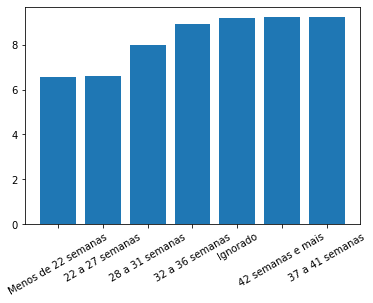

In [10]:
#Plotando o valor médio do APGAR5 por tempo de Gestação, usando pyplot
fig, ax = plt.subplots(figsize = (6,4))
ax.bar(nomes_grupo, media_grupo)
ax.tick_params(axis = 'x', rotation = 30)

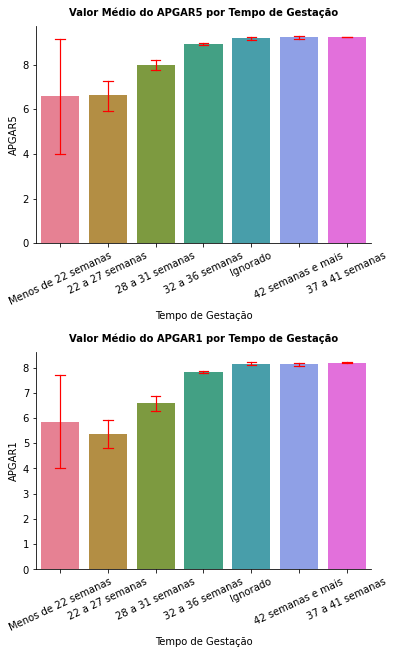

In [11]:
#Plotagem do APGAR5 e APGAR1 por tempo de Gestação, usando seaborn
with mpl.rc_context({'axes.spines.right': False, 'axes.spines.top': False, 'figure.subplot.hspace': 0.5}):
    plt.close('all')
    fig, ax = plt.subplots(2, 1, figsize = (6, 10))
    #Ordenando as barras pelo valor médio do APGAR
    for ax, col in zip(fig.get_axes(), ['APGAR5', 'APGAR1']):
        sns.barplot(ax = ax, 
                    x = 'GESTACAO', 
                    y = col, 
                    data = sinasc,
                    order = nomes_grupo, 
                    palette = 'husl',
                    errcolor = 'r', 
                    errwidth = 1.2, 
                    capsize = 0.2)

        #Nomeando rótulo no eixo x
        ax.set_xlabel('Tempo de Gestação', fontsize = 10)
        #Rotacionando os ticks no eixo x
        ax.tick_params(axis = 'x', rotation = 25)
        #Colocando o título
        ax.set_title(f'Valor Médio do {col} por Tempo de Gestação', fontsize = 10, fontweight = 'bold', y = 1.02)

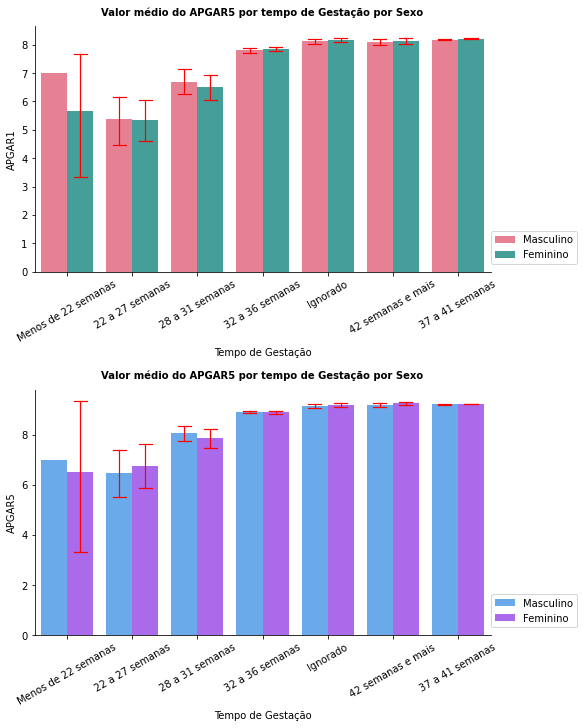

In [12]:
#Plotagem do APGAR1 e APGAR5 médio por tempo de Gestação de acordo com o sexo ordenado em ordem crescente
cols = ['APGAR1', 'APGAR5']
palette_colors = ['husl', 'cool']
with mpl.rc_context({'axes.spines.top': False, 'axes.spines.right': False, 'figure.constrained_layout.use': True}):
    fig, ax = plt.subplots(2, 1, figsize = (8, 10))
    for ax, col, palette_color in zip(fig.get_axes(), cols, palette_colors):
        sns.barplot(ax = ax, 
                    x = 'GESTACAO', 
                    y = col, 
                    hue = 'SEXO',
                    data = sinasc,
                    order = nomes_grupo,
                    palette = palette_color,
                    errcolor = 'r',
                    errwidth = 1.2,
                    capsize = 0.2)

        #Rotação dos ticks no eixo x
        ax.tick_params(axis = 'x', rotation = 30)
        #Eixo x
        ax.set_xlabel('Tempo de Gestação', fontsize = 10)
        #Título
        ax.set_title('Valor médio do APGAR5 por tempo de Gestação por Sexo', fontsize = 10, fontweight = 'bold', y = 1.02)
        #Legendas
        ax.legend(loc='right', bbox_to_anchor = (1.2, 0.1))

In [13]:
APGAR5_med_ESTCIVMAE = sinasc.groupby('ESTCIVMAE')['APGAR5'].mean()
APGAR5_med_ESTCIVMAE

ESTCIVMAE
Casada                    9.217387
Ignorado                  9.187364
Separado judicialmente    9.141907
Solteira                  9.113307
União consensual          9.211197
Viúva                     9.210526
Name: APGAR5, dtype: float64

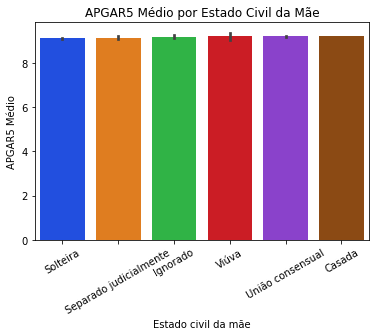

In [14]:
#Plotagem do APGAR5 médio por Estado civil da mãe, usando barplot
fig, ax = plt.subplots(figsize = (6, 4))
sns.barplot(ax = ax, 
            x='ESTCIVMAE', 
            y = 'APGAR5', 
            data = sinasc,
            order = APGAR5_med_ESTCIVMAE.sort_values().index, 
            palette = 'bright')
#Rotação dos ticks no eixo x
ax.tick_params(axis = 'x', rotation = 30)
#Adicionando rótulos aos eixos e um título
ax.set(xlabel = 'Estado civil da mãe', ylabel = 'APGAR5 Médio', title = 'APGAR5 Médio por Estado Civil da Mãe');

### Gráfico de barras: APGAR5 médio por CONSULTAS

In [15]:
APGAR5_med_consultas = sinasc.groupby('CONSULTAS')['APGAR5'].mean()
APGAR5_med_consultas

CONSULTAS
7 ou mais    9.207717
De 2 a 3     9.057395
De 4 a 6     9.154440
Ignorado     8.860000
Nenhuma      8.981481
Name: APGAR5, dtype: float64

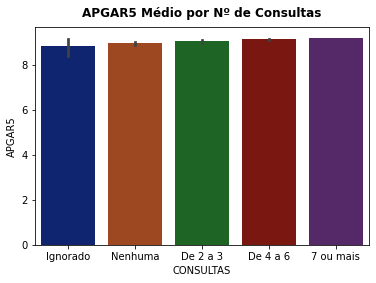

In [16]:
ax = sns.barplot(x = 'CONSULTAS', 
                 y = 'APGAR5', 
                 estimator = np.mean, 
                 data = sinasc,
                 order = APGAR5_med_consultas.sort_values().index, 
                 palette = 'dark')
ax.set_title('APGAR5 Médio por Nº de Consultas', fontsize = 12, fontweight = 'bold', y = 1.02);

### Painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

In [17]:
mpl.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

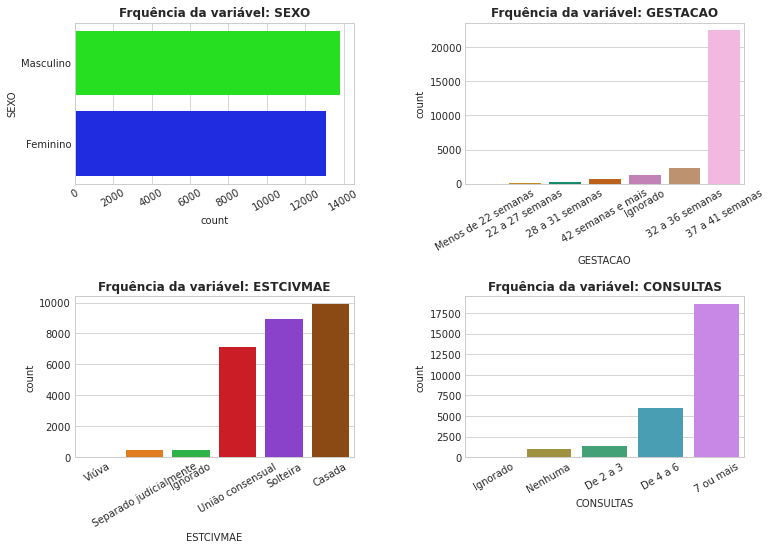

In [18]:
cols = ['SEXO', 'GESTACAO', 'ESTCIVMAE', 'CONSULTAS']
pcolors = ['hsv', 'colorblind', 'bright', 'husl']


with mpl.style.context('seaborn-whitegrid'):
    fig, axs = plt.subplots(2, 2, figsize = (12, 8))
    plt.subplots_adjust(wspace = 0.4, hspace = 0.7)
    axes = fig.get_axes()
    for ax, col, pcolor in zip(axes, cols, pcolors):
        if(col == 'SEXO'):
            sns.countplot(ax = ax, y = col, data = sinasc, palette = pcolor)
        else:
            sns.countplot(ax = ax, 
                          x = col, 
                          data = sinasc,
                          order = sinasc[col].value_counts().sort_values().index,
                          palette = pcolor)
        ax.tick_params(axis = 'x', rotation = 30)
        ax.set_title(f'Frquência da variável: {col}', fontweight = 'bold')


### boxplot da idade da mãe.

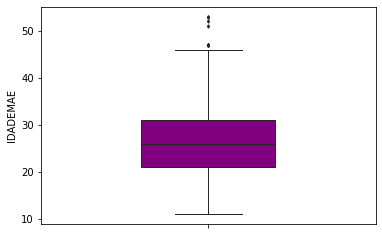

In [19]:
plt.figure(figsize = (6, 4))
sns.boxplot(y = 'IDADEMAE',
            data = sinasc,
            color = 'Purple',
            saturation = 1,
            width = 0.4,
            linewidth = 1,
            fliersize = 2.5);

### boxplot do peso do bebê

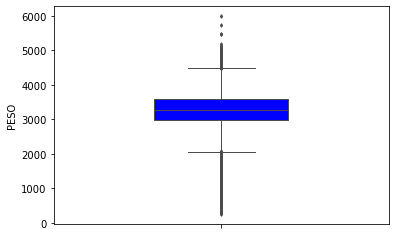

In [20]:
plt.figure(figsize = (6, 4))
sns.boxplot(y = 'PESO',
            data = sinasc,
            color = 'Blue',
            saturation = 1,
            width = 0.4,
            linewidth = 1,
            fliersize = 2.5);

### histograma da idade da mãe

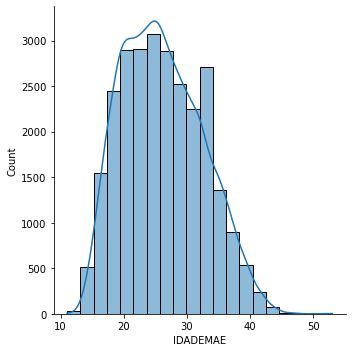

In [21]:
#sns.set_style('white', rc = {"axes.spines.right": False, "axes.spines.top": False})
sns.displot(data = sinasc,
            alpha = 0.5,
            x = 'IDADEMAE',
            bins = 20,
            kde = True);

### histograma do peso do bebê

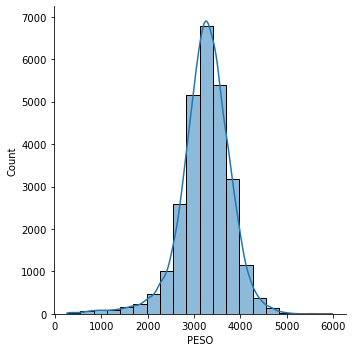

In [22]:
sns.displot(data = sinasc, 
            alpha = 0.5, 
            x = 'PESO', 
            bins = 20, 
            kde = True);

### Categorizando a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [23]:
sinasc.loc[(sinasc['APGAR5'] >= 0) & (sinasc['APGAR5'] <= 3), 'cat_APGAR5'] = 'asfixia grave'
sinasc.loc[(sinasc['APGAR5'] >= 4) & (sinasc['APGAR5'] <= 5), 'cat_APGAR5'] = 'asfixia moderada'
sinasc.loc[(sinasc['APGAR5'] >= 6) & (sinasc['APGAR5'] <= 7), 'cat_APGAR5'] = 'asfixia leve'
sinasc.loc[(sinasc['APGAR5'] >= 8) & (sinasc['APGAR5'] <= 10), 'cat_APGAR5'] = 'normal'

sinasc.head(3)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,cat_APGAR5
0,1,2679477.0,110001,1,19,União consensual,8 a 11 anos,NaN,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
1,1,2679477.0,110001,1,29,Casada,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
2,1,2679477.0,110001,1,37,Ignorado,8 a 11 anos,513205.0,2.0,0.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal


### Gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

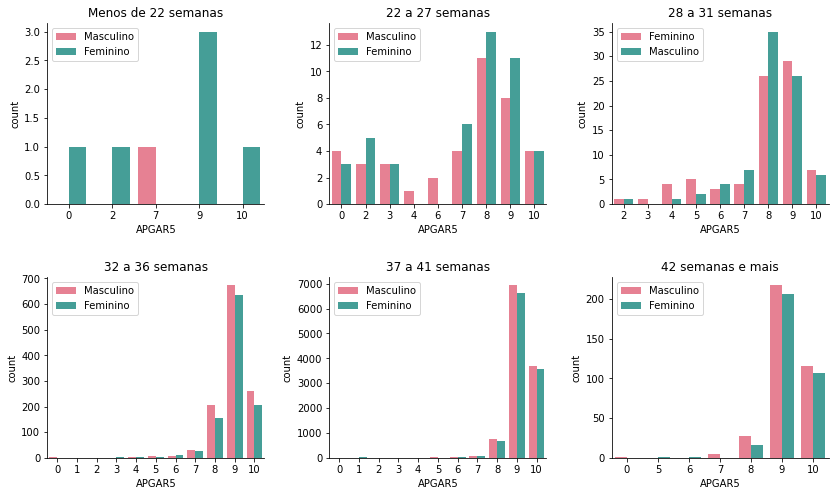

In [24]:
#Gráficos-Distribuição de APGAR5 por sexo para categorias de gestação
categorias = ['Menos de 22 semanas', '22 a 27 semanas', '28 a 31 semanas', 
                '32 a 36 semanas', '37 a 41 semanas', '42 semanas e mais']

with mpl.rc_context({'axes.spines.top': False, 'axes.spines.right': False}):
    fig, axs = plt.subplots(2, 3, figsize = (14, 8))
    #Ajuste dos gráficos
    plt.subplots_adjust(wspace = 0.3, hspace = 0.4)
    
    axes = fig.get_axes()
    for ax, categoria in zip(axes, categorias):
        sns.countplot(ax = ax, 
                      x = 'APGAR5', 
                      hue = 'SEXO', 
                      data = sinasc[sinasc['GESTACAO'] == categoria], 
                      palette = 'husl')
        ax.set_title(f'{categoria}')
        ax.legend(loc = 'upper left')

### Tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas


In [25]:
#distribuição da variável APGAR5 para cada classe de GESTACAO dado.
categorias = ['Menos de 22 semanas', '22 a 27 semanas', '28 a 31 semanas', 
                '32 a 36 semanas', '37 a 41 semanas', '42 semanas e mais',
              'Ignorado']
freq_percentual = pd.crosstab(sinasc['GESTACAO'], sinasc['APGAR5'], normalize = 'index') \
                    .reindex(categorias)
freq_percentual

APGAR5,0,1,2,3,4,5,6,7,8,9,10
GESTACAO,,,,,,,,,,,
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000896,0.000896,0.000448,0.000896,0.003583,0.004926,0.007613,0.025078,0.162114,0.585311,0.208240
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000933,0.001954,0.006705,0.062922,0.602309,0.323401
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Ignorado,0.000822,0.001645,0.001645,0.000822,0.001645,0.004112,0.005757,0.005757,0.070724,0.578947,0.328125


In [26]:
#Verificando se os percentuais de cada somam 1 (100%)
freq_percentual.sum(axis = 1)

GESTACAO
Menos de 22 semanas    1.0
22 a 27 semanas        1.0
28 a 31 semanas        1.0
32 a 36 semanas        1.0
37 a 41 semanas        1.0
42 semanas e mais      1.0
Ignorado               1.0
dtype: float64

#### Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faremos um gráfico de barras da tabela cruzada acima, a fim de concluir se este conjunto de dados corrobora ou não com a afirmação dos médicos.

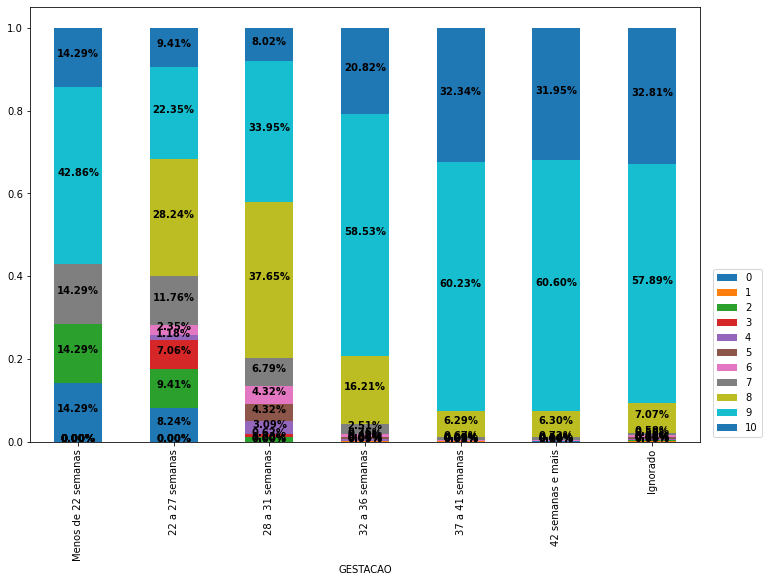

In [27]:
#Plotagem do gráfico de barras empilhadas
g = freq_percentual.plot(kind = 'bar', stacked = True, figsize = (12, 8))

for bar in g.patches:
    prop = bar.get_height()
    plt.text(x = bar.get_x() + bar.get_width()/2,
             y = bar.get_y() + bar.get_height()/2,
             s = f'{prop:.2%}',
             fontweight = 'bold',
             ha = 'center')
    
plt.legend(loc = 'lower right', bbox_to_anchor = (1.1, 0));

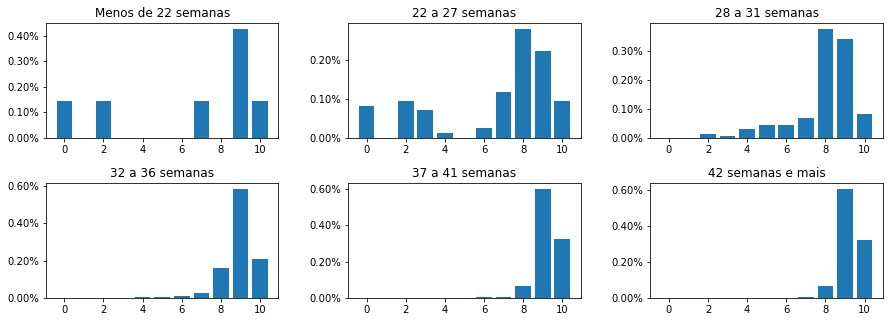

In [28]:
#Gráficos-Distribuição percentual dos valores de APGAR5 para categorias de gestação

from matplotlib import ticker

valores_APGAR5 = freq_percentual.columns
categorias = ['Menos de 22 semanas', '22 a 27 semanas', '28 a 31 semanas', 
                '32 a 36 semanas', '37 a 41 semanas', '42 semanas e mais']
with mpl.rc_context({'figure.subplot.wspace': 0.3, 'figure.subplot.hspace': 0.4}):
    #plt.subplots_adjust(wspace = 0.3, hspace = 0.4)
    fig = plt.figure(figsize = (15, 8))

    for i, categoria in enumerate(categorias):
        ax = fig.add_subplot(3, 3, i+1)
        ax.bar(valores_APGAR5, freq_percentual.loc[categoria])
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(decimals = 2))
        ax.set_title(f'{categoria}')


Percebe-se que para tempos de gestação acima de 32 semanas, há uma maior concentração de valores de APGAR5 entre 8 e 10, faixa de valores consideradas normais. No entanto, é possível obervar uma concentração significativa (acima de 50%) em torno desse valores para grupos com menos de 32 semanas. O que se observa é um maior espalhamento dos valores de APGAR5 para outras faixas de valores não considerados normais. Contudo, o fato de crianças terem nascidas antes de 37 semanas de gestação não é suficiente para afirmar que serão prematuras.

#### Verificando se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

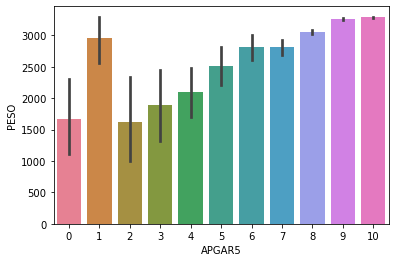

In [29]:
sns.barplot(x = 'APGAR5', 
            y = 'PESO', 
            data = sinasc, 
            palette = 'husl');

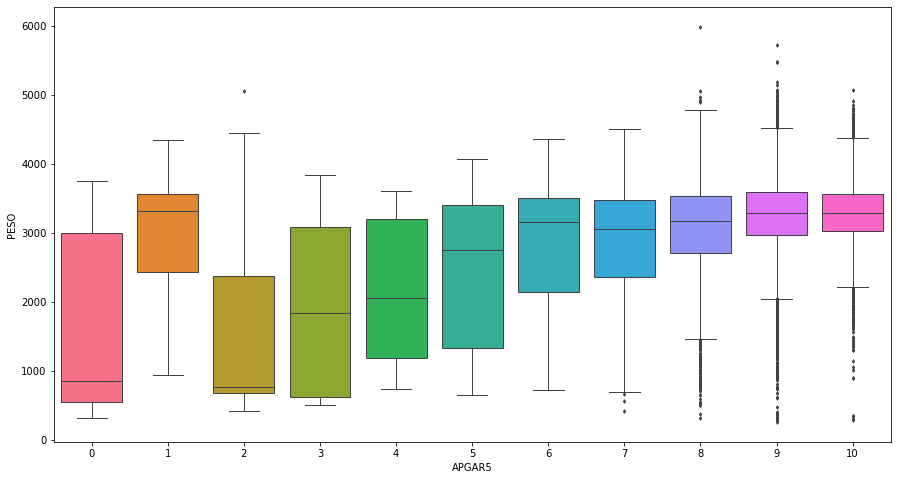

In [30]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.boxplot(ax = ax, 
            y = 'PESO', 
            x = 'APGAR5', 
            data = sinasc, 
            palette = 'husl', 
            saturation = 1, 
            linewidth = 1, 
            fliersize = 2.5);

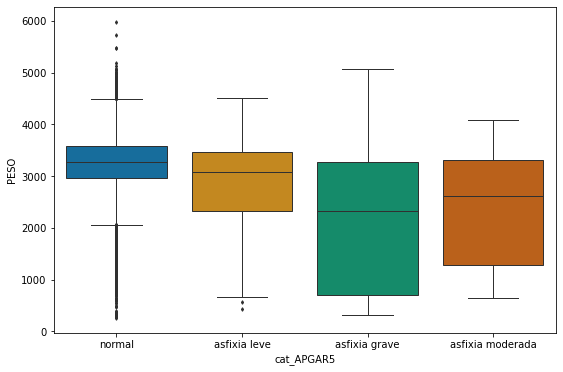

In [31]:
fig = plt.figure(figsize = (9, 6))
ax = fig.add_subplot()
sns.boxplot(ax = ax, 
            x = 'cat_APGAR5', 
            y = 'PESO', 
            data = sinasc, 
            palette = 'colorblind', 
            linewidth = 1, 
            fliersize = 2.5);

---